In [11]:
!pip install gcsfs google-cloud-bigquery



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [1]:
!pip install google-cloud-bigquery pandas matplotlib seaborn gcsfs



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Inizializza client BigQuery (assicurati che il progetto e la location siano corretti)
client = bigquery.Client(
    project="ccbd-esame-2025-rosariopavone",
    location="US"
)


In [3]:
query1 = """
SELECT Cancer_Type, COUNT(*) AS num_pazienti
FROM `ccbd-esame-2025-rosariopavone.cancer_dataset.Cancer_Patients`
GROUP BY Cancer_Type
ORDER BY num_pazienti DESC
"""
df1 = client.query(query1).to_dataframe()
df1.head()


,Cancer_Type,num_pazienti
0,Lung,514
1,Leukemia,510
2,Breast,507
3,Colon,506
4,Prostate,488


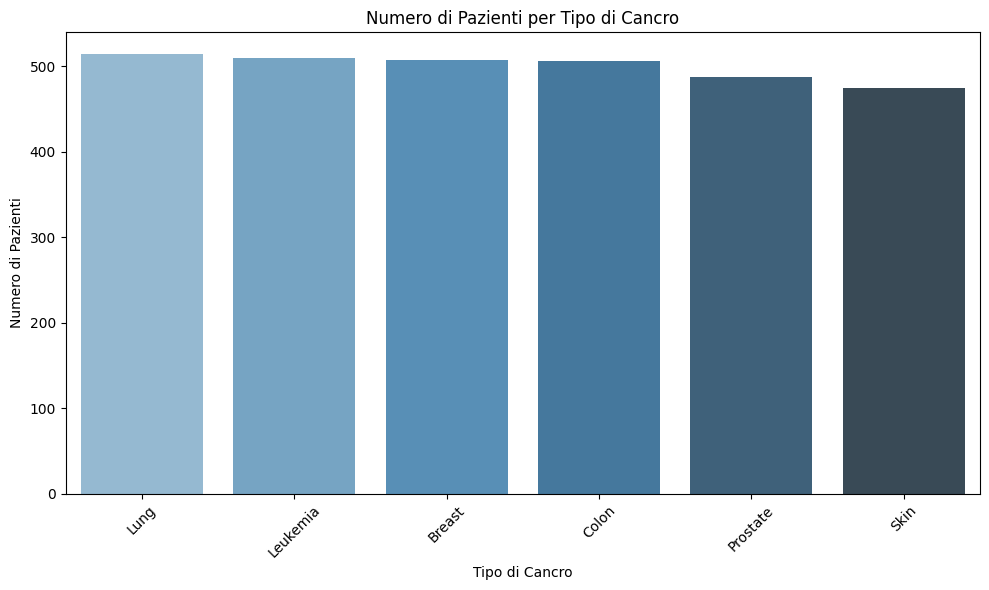

In [4]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df1, x="Cancer_Type", y="num_pazienti", palette="Blues_d")
plt.title("Numero di Pazienti per Tipo di Cancro")
plt.xlabel("Tipo di Cancro")
plt.ylabel("Numero di Pazienti")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [5]:
query2 = """
SELECT Cancer_Type,
       COUNT(*) AS totale_pazienti,
       SUM(CASE WHEN Survival_Months > 0 THEN 1 ELSE 0 END) AS sopravvissuti,
       ROUND(SUM(CASE WHEN Survival_Months > 0 THEN 1 ELSE 0 END) / COUNT(*) * 100, 2) AS percentuale_sopravvivenza
FROM `ccbd-esame-2025-rosariopavone.cancer_dataset.Cancer_Patients`
GROUP BY Cancer_Type
ORDER BY percentuale_sopravvivenza DESC
"""
df2 = client.query(query2).to_dataframe()
df2.head()


,Cancer_Type,totale_pazienti,sopravvissuti,percentuale_sopravvivenza
0,Prostate,488,488,100.0
1,Lung,514,514,100.0
2,Leukemia,510,510,100.0
3,Breast,507,507,100.0
4,Skin,475,475,100.0


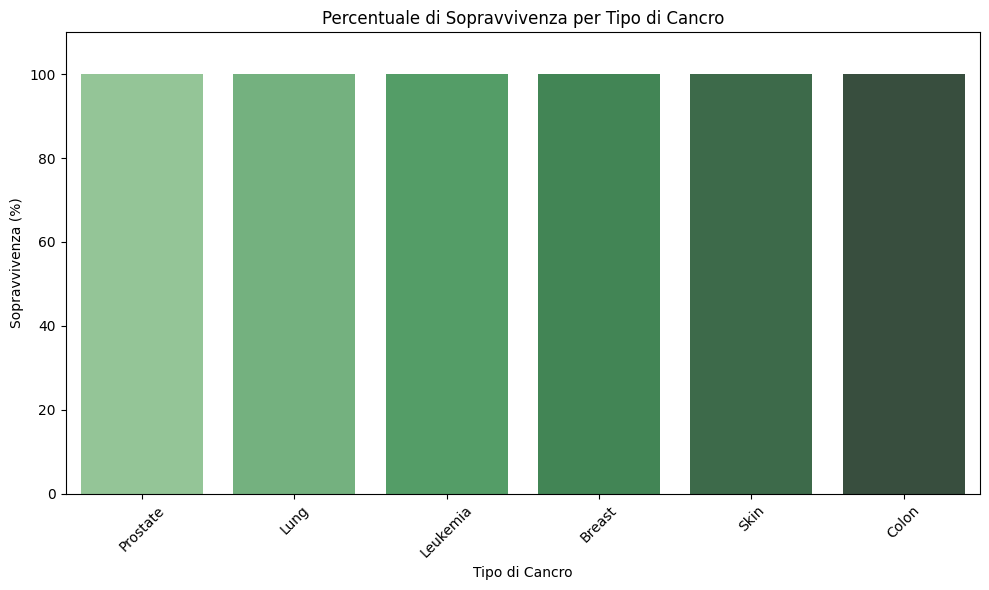

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df2, x="Cancer_Type", y="percentuale_sopravvivenza", palette="Greens_d")
plt.title("Percentuale di Sopravvivenza per Tipo di Cancro")
plt.xlabel("Tipo di Cancro")
plt.ylabel("Sopravvivenza (%)")
plt.ylim(0, 110)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [7]:
query3 = """
SELECT Stage,
       ROUND(AVG(Age), 1) AS eta_media,
       COUNT(*) AS numero_pazienti
FROM `ccbd-esame-2025-rosariopavone.cancer_dataset.Cancer_Patients`
GROUP BY Stage
ORDER BY eta_media DESC
"""
df3 = client.query(query3).to_dataframe()
df3.head()


,Stage,eta_media,numero_pazienti
0,I,54.6,755
1,IV,54.3,753
2,II,53.2,723
3,III,52.6,769


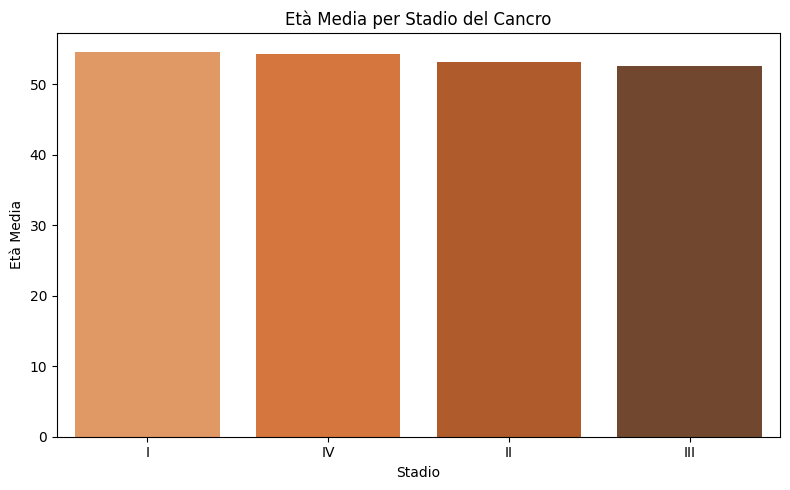

In [10]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df3, x="Stage", y="eta_media", palette="Oranges_d")
plt.title("Età Media per Stadio del Cancro")
plt.xlabel("Stadio")
plt.ylabel("Età Media")
plt.tight_layout()
plt.show()


In [12]:
!pip install gcsfs google-cloud-bigquery



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
